# Case Study 3
Using Apple Watch Health data to analyze my fitness 



# Introduction:

I was curious to know how my body fat percentage changed during the 6 months of my bulking phase (August 2020 to January 2021, and 6 months into my cutting phase (January 2021 - current). This case study is organized using the headers, and comments are scattered using the hashtag throughout this notebook, for more detail and insight as to what I was thinking when analyzing my health data. 

# (1) Download Packages


In [ ]:
# !pip install xmltodict

In [ ]:
import pandas
import numpy as np
import xmltodict


# (2) Import API as a dictionary

In [ ]:
# The following procedure imports the xml file using xmltodict, which I believe is way easier than using the root method. 

input_path = '/content/drive/MyDrive/export.xml'
with open(input_path, 'r') as xml:
    mydata = xmltodict.parse(xml.read())

In [ ]:
# Every dictionary has a key. The following line will provide a list of the keys. I recommended doing this first before trying to get the values at the same time)
mydata.keys()

odict_keys(['HealthData'])

In [ ]:
for k, v in mydata.items(): 
  print(k, '>', v)

# Just as I thought, trying to get the values can cause some problems 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Use the following function to get an idea of what the data looks like:
mydata['HealthData']
# Well it looks like its either "Me" or "Record" that's going to have my health information


In [ ]:
# One of the advantages of using xml to dict is that its so easy to subset keys

In [ ]:
# The following line is going to subset "record" from "health data" which is subsetted from "mydata"
healthdata = mydata['HealthData']['Record']

# very important our data is in the form of a data frame! 
df = pandas.DataFrame(healthdata)

# lets take a peek into the columns, as a check to make sure we did things right
df.columns

Index(['@type', '@sourceName', '@sourceVersion', '@unit', '@creationDate',
       '@startDate', '@endDate', '@value', '@device', 'MetadataEntry',
       'HeartRateVariabilityMetadataList'],
      dtype='object')

In [ ]:
# I love the unique function because it spits out every unique instance of our data variables
df['@type'].unique()

array(['HKQuantityTypeIdentifierBodyMassIndex',
       'HKQuantityTypeIdentifierHeight',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierOxygenSaturation',
       'HKQuantityTypeIdentifierBodyFatPercentage',
       'HKQuantityTypeIdentifierLeanBodyMass',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierDistanceCycling',
       'HKQuantityTypeIdentifierRestingHeartRate',
       'HKQuantityTypeIdentifierVO2Max',
       'HKQuantityTypeIdentifierWalkingHeartRateAverage',
       'HKQuantityTypeIdentifierEnvironmentalAudioExposure',
       'HKQuantityTypeIdentifierHeadphoneAudioExposure',
       'HKQuantityTypeIdentifierWalkingDoubleSupp

# (3) Pre-processing of data:

In [ ]:
# It looks right, but it hurts my head reading the "HKCatagory or HKQuantity" string
# One neat trick we can do to make things easier on the eyes is to remove that first string

df['@type'] = df['@type'].str.replace('HKQuantityTypeIdentifier', 'My_')
df['@type'] = df['@type'].str.replace('HKCategoryTypeIdentifier', 'My_')

In [ ]:
df['@type'].unique()

array(['My_BodyMassIndex', 'My_Height', 'My_BodyMass', 'My_HeartRate',
       'My_OxygenSaturation', 'My_BodyFatPercentage', 'My_LeanBodyMass',
       'My_StepCount', 'My_DistanceWalkingRunning',
       'My_BasalEnergyBurned', 'My_ActiveEnergyBurned',
       'My_FlightsClimbed', 'My_AppleExerciseTime', 'My_DistanceCycling',
       'My_RestingHeartRate', 'My_VO2Max', 'My_WalkingHeartRateAverage',
       'My_EnvironmentalAudioExposure', 'My_HeadphoneAudioExposure',
       'My_WalkingDoubleSupportPercentage',
       'My_SixMinuteWalkTestDistance', 'My_AppleStandTime',
       'My_WalkingSpeed', 'My_WalkingStepLength',
       'My_WalkingAsymmetryPercentage', 'My_StairAscentSpeed',
       'My_StairDescentSpeed', 'HKDataTypeSleepDurationGoal',
       'My_SleepAnalysis', 'My_AppleStandHour', 'My_MindfulSession',
       'My_HandwashingEvent', 'My_HeartRateVariabilitySDNN'], dtype=object)

In [ ]:
# I notice that there are references to dates- in case they aren't in the right format, it is standard procedure to set them manually as a date data format
for col in ['@creationDate', '@startDate', '@endDate']:
    df[col] = pandas.to_datetime(df[col])

In [ ]:
# In addition, its probably important to make sure our values are in numeric format and not, like in character or an object
# We want either integer or float 

df['@value'] = pandas.to_numeric(df['@value'], errors='coerce')

In [ ]:
df_long = df.pivot_table(index='@endDate', columns='@type', values='@value')
df_long.shape # wow so this is a really long dataset, and working with this might be really hard 

# lets try to restructure our dataset

(204186, 29)

In [ ]:
df_resampled = df_long.resample('M').agg({'My_BodyFatPercentage' : np.mean,
                                 'My_DistanceWalkingRunning' : sum})
df_resampled.shape

(14, 2)

In [ ]:
df_resampled.head(20)

,My_BodyFatPercentage,My_DistanceWalkingRunning
@endDate,,
2020-08-31 00:00:00-05:00,0.173800,83.139151
2020-09-30 00:00:00-05:00,0.190190,74.196088
2020-10-31 00:00:00-05:00,0.185910,58.591375
2020-11-30 00:00:00-05:00,0.178000,65.227332
2020-12-31 00:00:00-05:00,0.169820,32.953760
2021-01-31 00:00:00-05:00,0.135027,116.366422
2021-02-28 00:00:00-05:00,0.135177,88.421452
2021-03-31 00:00:00-05:00,0.142775,184.337465
2021-04-30 00:00:00-05:00,0.142122,126.508467


In [ ]:
# I think it would be particularly useful to find the difference between each month

df_resampled['Difference (%)'] = df_resampled['My_BodyFatPercentage'].diff()

# (4) Final Dataframe Created

In [ ]:
# In case you want this in a csv format;
# df_resampled.to_csv('df_resampled.csv')
# !cp df_resampled.csv "drive/My Drive/"

# (5) Deliverable 1: Time Plot of My Body Fat Percentage over 1 Year

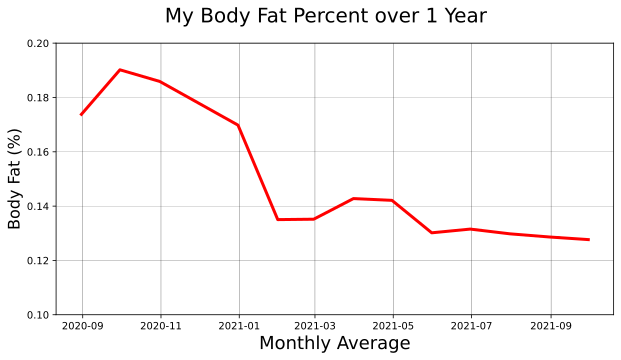

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5)) 
plt.grid(which = 'major', axis = 'x', color='black', linestyle='-', linewidth=0.25)
plt.grid(which = 'major', axis = 'y', color='black', linestyle='-', linewidth=0.15)
fig.suptitle('My Body Fat Percent over 1 Year', fontsize=20)
plt.xlabel('Monthly Average', fontsize=18)
plt.ylabel('Body Fat (%)', fontsize=16)
sns.lineplot(data=df_resampled['My_BodyFatPercentage'], color='red', linewidth=3)
ymin, ymax = plt.ylim(0.1, 0.20)

This plot shows the trend in body fat percentage over time. Clearly, at the height of my bulking phase, was when my percentage was highest. Once I started cutting, dieting, and doing cardio religiously, my percentage dropped by almost 8 percent since the height of my bulk. 

In [ ]:
df_resampled['Bulking'] = 0
df_resampled.loc[(df_resampled.index > '20200801') & (df_resampled.index < '20210101'), 'Bulking'] = 1
df_resampled['Cutting'] = 0
df_resampled.loc[df_resampled.index > '20210101', 'Cutting'] = 1
df_resampled['Outdoor Cardio'] = 0
df_resampled.loc[df_resampled.index > '20210401', 'Outdoor Cardio'] = 1

In [ ]:
df_resampled.head(12)

,My_BodyFatPercentage,My_DistanceWalkingRunning,Difference (%),Bulking,Cutting,Outdoor Cardio
@endDate,,,,,,
2020-08-31 00:00:00-05:00,0.173800,83.139151,NaN,1,0,0
2020-09-30 00:00:00-05:00,0.190190,74.196088,0.016390,1,0,0
2020-10-31 00:00:00-05:00,0.185910,58.591375,-0.004280,1,0,0
2020-11-30 00:00:00-05:00,0.178000,65.227332,-0.007910,1,0,0
2020-12-31 00:00:00-05:00,0.169820,32.953760,-0.008180,1,0,0
2021-01-31 00:00:00-05:00,0.135027,116.366422,-0.034793,0,1,0
2021-02-28 00:00:00-05:00,0.135177,88.421452,0.000150,0,1,0
2021-03-31 00:00:00-05:00,0.142775,184.337465,0.007599,0,1,0
2021-04-30 00:00:00-05:00,0.142122,126.508467,-0.000654,0,1,1


# (6) Deliverable 2: Time Plot of my Body Fat Percent Difference Over 1 Year

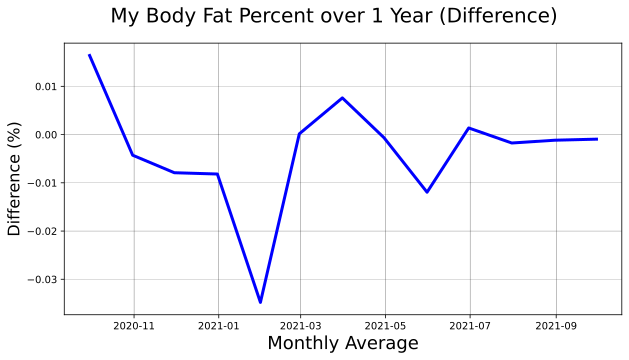

In [ ]:
fig = plt.figure(figsize=(10,5)) 
plt.grid(which = 'major', axis = 'x', color='black', linestyle='-', linewidth=0.25)
plt.grid(which = 'major', axis = 'y', color='black', linestyle='-', linewidth=0.15)
fig.suptitle('My Body Fat Percent over 1 Year (Difference)', fontsize=20)
plt.xlabel('Monthly Average', fontsize=18)
plt.ylabel('Difference (%)', fontsize=16)
sns.lineplot(data=df_resampled['Difference (%)'], color='Blue', linewidth=3)


# (7) Deliverable 3: Correlation Matrix of Apple Watch Health Variables:

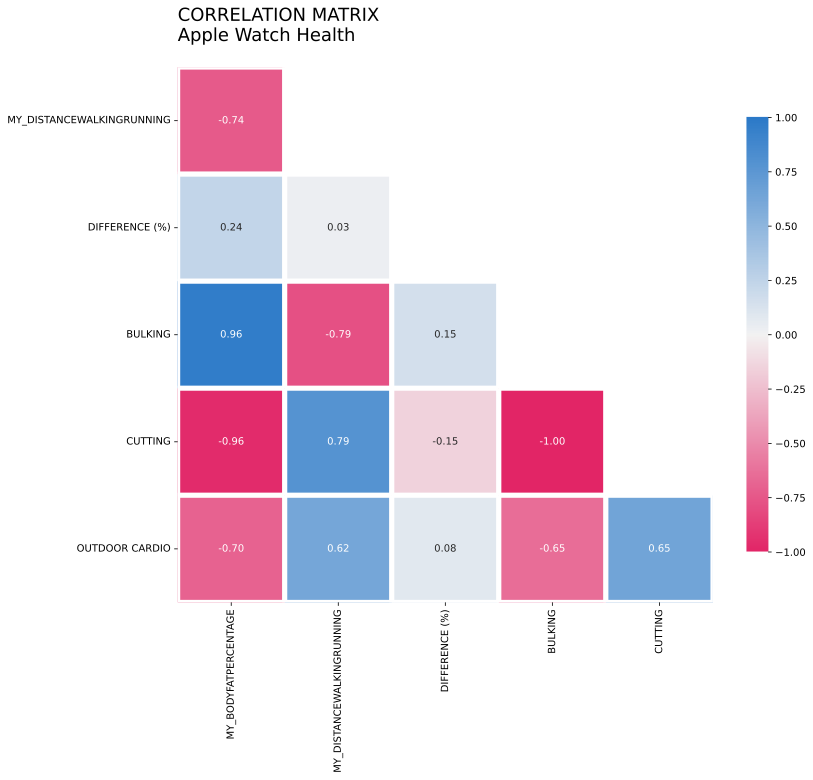

In [ ]:
# get correlations
df_corr = df_resampled.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 250, 90, 50, as_cmap=True)
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX\nApple Watch Health\n'
plt.title(title, loc='left', fontsize=18)
plt.show()



The heat map above shows that Body Fat Percent is inversely correlated to Cutting and Outdoor Cardio, while positively associated with bulking. This makes sense, as these binary traits were coded as 0 when false, and 1 when true. Therefore the statistics can analyze this pattern to let us know about the relationship with bodyfat percent. To explain further, the heat map indicated that there was a very strong inverse relationship between cutting and body fat %, meaning the months I was cutting (binary trait for cutting = 1) my body fat percentage was very low. On the converse, during the months I was cutting (binary trait for bulking = 0) there was a moderately strong positive relationship, which was also expected since bulking = 0. 

(8) Deliverable 4: Density Plot overlayed on a Scatter Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


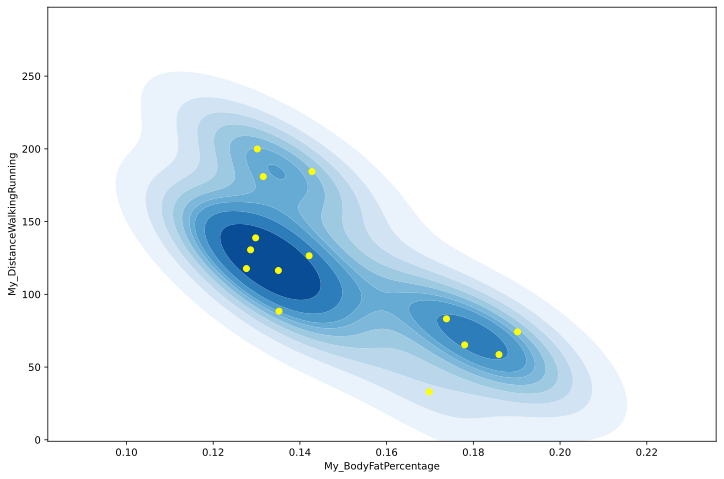

In [ ]:
fig, ax = plt.subplots(1, figsize=(12,8))
sns.kdeplot(df_resampled.My_BodyFatPercentage, df_resampled.My_DistanceWalkingRunning, cmap='Blues',
           shade=True, shade_lowest=False, clip=(-1,300))
plt.scatter(df_resampled.My_BodyFatPercentage, df_resampled.My_DistanceWalkingRunning, color='Yellow')

In [ ]:
# The plot above shows that the relationship between My_DistanceWalkingRunning is not perfectly in line with My_BodyFatPercent. However, it is clear that there is some sort of inverse relationship, which is expected. 

# (8) Conclusions:

Last year, I purchased an Apple Watch to keep track of my fitness. Using the Apple Watch API, I was able to import the XML file into a dictionary to easily access some of the data that is hidden in this dense data structure. I was able to find my health records, as well as different variables that I definetly plan to look into later in the future. For this case study, I wanted to see how my body fat percentage changed during the 6 months of my bulking phase (August 2020 to January 2021, and 6 months into my cutting phase (January 2021 - current). 

From my elementary analysis of my health data, I found that by plotting a time series plot of Body Fat Percent against month, there was a distinct peak during the height of my bulk phase, and a sharp decline the moment I started dieting and religiously doing cardio. I notice I was able to even shed an extra percent by doing out door cardio, which I believe is way more body intensive than indoor running, due to hotter weather and hills. I was further able to validate this by plottiong a correlation heat map. The heat map looked as I expected. Variables such as "Body Fat Percent" and "Amount Walk/Run" were inversely correlated- which makes sense. The more cardio I do, the lower my BF percent should be. I was also able to add binary traits, such as Bulking and Cutting, which were denoted by 0 and 1. I manually set these dates and added them into my dataset. The heat map also showed a very strong inverse relationship between cutting and body fat %, meaning the months I was cutting (binary trait for cutting = 1) my body fat percentage was very low. On the converse, during the months I was cutting (binary trait for bulking = 0) there was a moderately strong positive relationship, which was also expected. 

In conclusion, this case study helped me analyze my health trends in more detail than simply glancing at my app. I will be using what I learned to analyze more intersting API's to add to my data science portfolio. 

In [3]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Case Study III: Apple Watch.ipynb')

--2021-09-20 16:58:18--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-09-20 16:58:19 (32.7 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Case Study III: Apple Watch.ipynb to pdf
/bin/sh: 1: inkscape: not found
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance

'File Download Unsuccessful. Saved in Google Drive'